In [37]:
"""IMPORT PYTHON LIBRARY"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [229]:
"""STANDARD SCALER"""
def SS(inputdata):
    return StandardScaler().fit_transform(inputdata)

"""PRINCIPAL COMPONENT ANALYSIS"""
def pca1(inputdata, wavelengths, label, label_name, num_comps):
    pca = PCA(n_components=num_comps)
    """Fit the spectral data and extract the explained variance ratio"""
    X = pca.fit(inputdata)
    """Explained variances equal to n_components largest eigenvalues of the covariance matrix of X."""
    var_expl = X.explained_variance_
    for a in var_expl:
        if(a>0.5):
            print('Sorted Eignevalues: {}'.format(round(a, 3)))
    """Percentage of variance explained by each of the selected components."""
    var_expl_ratio = X.explained_variance_ratio_
    for b in var_expl_ratio:
        print('Explained Variance: {}%'.format(round(b*100, 2)))
    """Scree Plot"""
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(7,4))
        fig.set_tight_layout(True)
        ax.plot(var_expl_ratio, '-o', label='Explained Variance %')
        ax.plot(np.cumsum(var_expl_ratio), '-o', label = 'Cumulative Variance %')
        ax.set_ylabel('Cumulative Explained Variance')
        ax.set_xlabel('Number of Components')
        ax.set_yticks(np.arange(0.0, 1.1, step=0.1), fontsize=12, fontname="Segoe UI")
        ax.set_xticks(np.arange(0, 10, step=1), fontsize=12, fontname="Segoe UI")
        #ax.set_title('Scree plot: Original Spectra')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.set_facecolor("white")
    plt.legend()
    plt.show()

    """Get Principle Components (PCs) or PCA scores"""
    # Transform on the scaled features
    Xcomps = pca.fit_transform(inputdata)
    Xcomps = SS(Xcomps)

    """PCA Score Plot"""
    PCs_var = var_expl_ratio*100
    unique = list(set(label))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(8,7))
        #ax = fig.add_subplot(111, projection='3d')
        for i, u in enumerate(unique):
            col = np.expand_dims(np.array(colors[i]), axis=0)
            pc1 = [Xcomps[j,0] for j in range(len(Xcomps[:,0])) if label[j] == u]    # PC1
            pc2 = [Xcomps[j,1] for j in range(len(Xcomps[:,1])) if label[j] == u]    # PC2
            pc3 = [Xcomps[j,2] for j in range(len(Xcomps[:,2])) if label[j] == u]    # PC3
            plt.scatter(pc1, pc2, #
                        c=col, s=20, edgecolors='k', label=str(u))
        plt.xlabel('PC1 ('+str(round(PCs_var[0],2))+'%)', fontsize=12)   # ---------------------- < CHANGE INPUT
        plt.ylabel('PC2 ('+str(round(PCs_var[1],2))+'%)', fontsize=12)   # ---------------------- < CHANGE INPUT
        plt.legend(label_name, loc = 'lower left')
        #plt.title('2D PCA ' + f'(Total Explained Variance: {total_var:.2f}%)')
        ax.axhline(y=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Horizontal Line ')
        ax.axvline(x=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Vertical Line ')
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        yabs_max = abs(max(ax.get_ylim(), key=abs))
        ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
        xabs_max = abs(max(ax.get_xlim(), key=abs))
        ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.set_facecolor("white")
        plt.show()

    """Principal components correlation coefficients"""
    loadings = pca.components_
    num_pcs = pca.n_features_in_

    pc_list = ['PC'+ str(i) for i in list(range(1, num_pcs+1))]
    loadings_df =pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

    plt.style.context(('ggplot'))
    plt.figure(figsize=(8, 5))
    #plt.plot(wavelengths, loadings_df['PC5'], label='PC5')
    #plt.plot(wavelengths, loadings_df['PC4'], label='PC4')
    #plt.plot(wavelengths, loadings_df['PC3'], label='PC3')
    plt.plot(wavelengths, loadings_df['PC2'], label='PC2')
    plt.plot(wavelengths, loadings_df['PC1'], label='PC1')
    plt.ylabel('PCA Loadings', fontsize=12, fontname="Segoe UI")
    #plt.ylabel('PC1 ('+str(round(PCs_var[0],2))+'%)', fontsize=12, fontname="Segoe UI")
    plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
    plt.axhline(y=0.0, color='black', linestyle='-')
    plt.legend(loc = 'lower left')
    plt.show()

    return Xcomps

def pca_eigen(n_components, inputdata, target, target_name):
    row, col = inputdata.shape

    """STEP 1 - STANDARDIZE DATA"""
    #data = StandardScaler().fit_transform(inputdata)

    """STEP 2 - COVARIANCE MATRIX"""
    mean_vector = np.mean(inputdata, axis=0)
    covmat = (inputdata - mean_vector).T.dot((inputdata - mean_vector))/(inputdata.shape[0]-1)
    # cara lain
    covmat1 = np.cov(inputdata.T)

    """STEP 3 - EIGEN DECOMPOSITION"""
    # Eigen from covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covmat1)
    # Eigen from correlatioin matrix
    cormat = np.corrcoef(inputdata.T)
    eigenvalues1, eigenvectors1 = np.linalg.eig(cormat)

    #print('Covariance Matrix \n%s' %covmat1)
    #print('Eigenvectors \n%s' %eigenvectors)
    #print('Eigenvectors \n%s' %eigenvalues)

    """STEP 4 - SELECTING PCs"""
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    for a in eigen_pairs:
        #if(a[0]>0.5):
            print('Sorted Eignevalues: {}'.format(round(a[0],3)))

    """STEP 5 EXPLAINED VARIANCE"""
    total_var = sum(eigenvalues)
    var_exp = [(i/total_var) for i in sorted(eigenvalues, reverse=True)]
    #print('Variance Explained: ', var_exp)
    print('Variance Explained:')
    for b in var_exp:
        print('Explained variation PC : {}%'.format(round(b*100,3)))
    cum_var_exp = np.cumsum(var_exp)
    print('Cumulative Explained Variation : {}%'.format(round(cum_var_exp[n_components]*100,3)))

    print('Percentage of variance the first two principal components each contain: ', var_exp[0:2])
    print('Percentage of variance the first two principal components each contain: ', sum(var_exp[0:2]))
    """Scree Plot"""
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(7,4))
        fig.set_tight_layout(True)
        ax.plot(var_exp, '-o', label='Explained Variance %')
        ax.plot(np.cumsum(var_exp), '-o', label = 'Cumulative Variance %')
        ax.set_ylabel('Cumulative Explained Variance')
        ax.set_xlabel('Number of Components')
        ax.set_yticks(np.arange(0.0, 1.1, step=0.1), fontsize=12, fontname="Segoe UI")
        #ax.set_xticks(np.arange(0, 20, step=1), fontsize=12, fontname="Segoe UI")
        ax.set_title('Scree plot')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.set_facecolor("white")
    plt.legend()
    plt.show()

    """STEP 6 PROJECTION MATRIX"""
    matrix_w = np.hstack((eigen_pairs[0][1].reshape(col,1),
                          eigen_pairs[1][1].reshape(col,1),
                          eigen_pairs[2][1].reshape(col,1),
                          eigen_pairs[3][1].reshape(col,1),
                          eigen_pairs[4][1].reshape(col,1),
                          eigen_pairs[5][1].reshape(col,1),
                          eigen_pairs[6][1].reshape(col,1),
                          eigen_pairs[7][1].reshape(col,1),
                          eigen_pairs[8][1].reshape(col,1),
                          eigen_pairs[9][1].reshape(col,1)))

    """STEP 7 - TRANSFORM THE ORIGINAL MATRIX TO PCs"""
    X_std = SS(inputdata)
    scores = X_std.dot(matrix_w)
    print(scores)

    """PC1 vs PC2 visualization - PCA Score Plot"""
    pc1 = scores[:,0]
    pc2 = scores[:,1]
    zipped = list(zip(pc1, pc2, target))
    pca_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'Target'])

    print('Print PCs Score:\n', pca_df)

    sample1_pc1 = pca_df.loc[pca_df["Target"]==0, "PC1"]
    sample1_pc2 = pca_df.loc[pca_df["Target"]==0, "PC2"]
    sample2_pc1 = pca_df.loc[pca_df["Target"]==1, "PC1"]
    sample2_pc2 = pca_df.loc[pca_df["Target"]==1, "PC2"]
    sample3_pc1 = pca_df.loc[pca_df["Target"]==2, "PC1"]
    sample3_pc2 = pca_df.loc[pca_df["Target"]==2, "PC2"]

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111) #, projection='3d')
    ax.scatter(sample1_pc1, sample1_pc2, c="orange", marker="^")
    ax.scatter(sample2_pc1, sample2_pc2, c="red", marker="s")
    ax.scatter(sample3_pc1, sample3_pc2, c="green", marker="o")
    ax.axhline(y=0.0, color='black', linestyle='dashed', alpha = 1.0)
    ax.axvline(x=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Vertical Line ')     # , - -- : None , solid, dashed, dashdot, dotted
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    yabs_max = abs(max(ax.get_ylim(), key=abs))
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    xabs_max = abs(max(ax.get_xlim(), key=abs))
    ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.set_xlabel('PC1 ('+str(round(var_exp[0]*100,2))+'%)').set_color('black')
    ax.set_ylabel('PC2 ('+str(round(var_exp[1]*100,2))+'%)').set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.set_facecolor("white")
    plt.legend(target_name, loc = 'lower right')
    plt.title('2D PCA')
    plt.show()

    return scores

"""USING SCIKIT-LEARN LIBRARY"""
def pca(num_comps, inputdata, label, target_name, feature):
    pca = PCA(n_components=num_comps)
    """Fit the spectral data and extract the explained variance ratio"""
    X = pca.fit(inputdata)
    """Explained variances equal to n_components largest eigenvalues of the covariance matrix of X."""
    var_expl = X.explained_variance_
    for a in var_expl:
        #if(a>0.5):
            print('Sorted Eignevalues: {}'.format(round(a, 3)))
    """Percentage of variance explained by each of the selected components."""
    var_expl_ratio = X.explained_variance_ratio_
    for b in var_expl_ratio:
        print('Explained Variance: {}%'.format(round(b*100, 2)))
    """Scree Plot"""
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(7,4))
        fig.set_tight_layout(True)
        ax.plot(var_expl_ratio, '-o', label='Explained Variance %')
        ax.plot(np.cumsum(var_expl_ratio), '-o', label = 'Cumulative Variance %')
        ax.set_ylabel('Cumulative Explained Variance')
        ax.set_xlabel('Number of Components')
        ax.set_yticks(np.arange(0.0, 1.1, step=0.1), fontsize=12, fontname="Segoe UI")
        ax.set_xticks(np.arange(0, 10, step=1), fontsize=12, fontname="Segoe UI")
        #ax.set_title('Scree plot: Original Spectra')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.set_facecolor("white")
    plt.legend()
    plt.show()

    """Get Principle Components (PCs) or PCA scores"""
    # Transform on the scaled features
    Xcomps = pca.fit_transform(inputdata)
    Xcomps = SS(Xcomps)

    """PC1 vs PC2 visualization - PCA Score Plot"""
    pc1 = Xcomps[:,0]
    pc2 = Xcomps[:,1]
    zipped = list(zip(pc1, pc2, target))
    pca_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'Target'])

    print('Print PCs Score:\n', pca_df)

    sample1_pc1 = pca_df.loc[pca_df["Target"]==0, "PC1"]
    sample1_pc2 = pca_df.loc[pca_df["Target"]==0, "PC2"]
    sample2_pc1 = pca_df.loc[pca_df["Target"]==1, "PC1"]
    sample2_pc2 = pca_df.loc[pca_df["Target"]==1, "PC2"]
    sample3_pc1 = pca_df.loc[pca_df["Target"]==2, "PC1"]
    sample3_pc2 = pca_df.loc[pca_df["Target"]==2, "PC2"]

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111) #, projection='3d')
    ax.scatter(sample1_pc1, sample1_pc2, c="orange", marker="^")
    ax.scatter(sample2_pc1, sample2_pc2, c="red", marker="s")
    ax.scatter(sample3_pc1, sample3_pc2, c="green", marker="o")
    ax.axhline(y=0.0, color='black', linestyle='dashed', alpha = 1.0)
    ax.axvline(x=0.0, color='black', linestyle='dashed', alpha = 1.0) # label = 'Vertical Line ')     # , - -- : None , solid, dashed, dashdot, dotted
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    yabs_max = abs(max(ax.get_ylim(), key=abs))
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    xabs_max = abs(max(ax.get_xlim(), key=abs))
    ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.set_xlabel('PC1 ('+str(round(var_expl_ratio[0]*100,2))+'%)').set_color('black')
    ax.set_ylabel('PC2 ('+str(round(var_expl_ratio[1]*100,2))+'%)').set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.set_facecolor("white")
    plt.legend(target_name, loc = 'lower right')
    plt.title('2D PCA')
    plt.show()

    """Principal components correlation coefficients"""
    loadings = pca.components_
    zipped = list(zip(loadings[0], loadings[1], feature))
    df_loadings = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'Feature'])
    print(df_loadings)

    scalePC1 = 1.0/(pc1.max() - pc1.min())
    scalePC2 = 1.0/(pc2.max() - pc2.min())

    fig, ax = plt.subplots(figsize=(8,7))
    for i, feature in enumerate(feature):
        ax.arrow(0, 0, loadings[0,i],
                 loadings[1,i],
#                 head_width = 0.03,
#                 head_length = 0.03,
                 color="red")
        ax.text(loadings[0,i] * 1.15,
                loadings[1,i] * 1.15,
                feature,
                color="red",
                fontsize=10)
        ax.scatter(pc1*scalePC1, pc2*scalePC2)
        ax.scatter(df_loadings['PC1'], df_loadings['PC2'])
    for i, label in enumerate(label):
        ax.text(pc1[i] * scalePC1,
                pc2[i] * scalePC2,
                str(label), fontsize=10)

    ax.set_xlabel('PC1', fontsize=10)
    ax.set_ylabel('PC2', fontsize=10)
    ax.set_title('Biplot', fontsize=10)
    plt.title('2D PCA')
    plt.show()

    return Xcomps

Sorted Eignevalues: 4.732
Sorted Eignevalues: 2.511
Sorted Eignevalues: 1.454
Sorted Eignevalues: 0.924
Sorted Eignevalues: 0.858
Sorted Eignevalues: 0.645
Sorted Eignevalues: 0.554
Sorted Eignevalues: 0.35
Sorted Eignevalues: 0.291
Sorted Eignevalues: 0.252
Sorted Eignevalues: 0.227
Sorted Eignevalues: 0.17
Sorted Eignevalues: 0.104
Variance Explained:
Explained variation PC : 36.199%
Explained variation PC : 19.207%
Explained variation PC : 11.124%
Explained variation PC : 7.069%
Explained variation PC : 6.563%
Explained variation PC : 4.936%
Explained variation PC : 4.239%
Explained variation PC : 2.681%
Explained variation PC : 2.222%
Explained variation PC : 1.93%
Explained variation PC : 1.737%
Explained variation PC : 1.298%
Explained variation PC : 0.795%
Cumulative Explained Variation : 97.907%
Percentage of variance the first two principal components each contain:  [0.3619884809992636, 0.19207490257008933]
Percentage of variance the first two principal components each contain

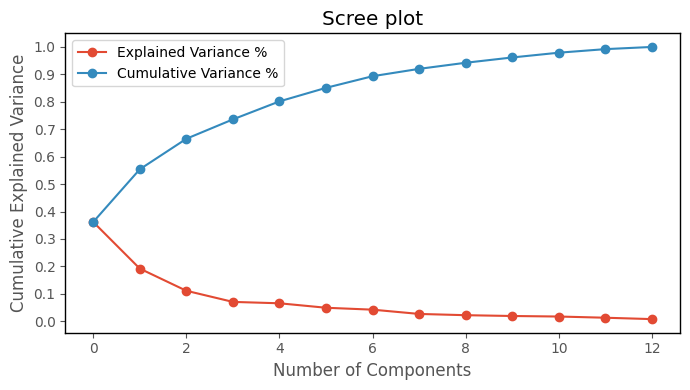

[[-3.31675081e+00  1.44346263e+00 -1.65739045e-01 ... -6.51390947e-02
  -6.41442706e-01  1.02095585e+00]
 [-2.20946492e+00 -3.33392887e-01 -2.02645737e+00 ... -1.02441595e+00
   3.08846753e-01  1.59701372e-01]
 [-2.51674015e+00  1.03115130e+00  9.82818670e-01 ...  3.44216131e-01
   1.17783447e+00  1.13360857e-01]
 ...
 [ 2.67783946e+00  2.76089913e+00 -9.40941877e-01 ... -4.70238043e-02
  -1.22214687e-03 -2.47997312e-01]
 [ 2.38701709e+00  2.29734668e+00 -5.50696197e-01 ... -3.90828774e-01
  -5.74476725e-02  4.91489502e-01]
 [ 3.20875816e+00  2.76891957e+00  1.01391366e+00 ...  2.92913734e-01
  -7.41660423e-01 -1.17969019e-01]]
Print PCs Score:
           PC1       PC2  Target
0   -3.316751  1.443463       0
1   -2.209465 -0.333393       0
2   -2.516740  1.031151       0
3   -3.757066  2.756372       0
4   -1.008908  0.869831       0
..        ...       ...     ...
173  3.370524  2.216289       2
174  2.601956  1.757229       2
175  2.677839  2.760899       2
176  2.387017  2.297347   

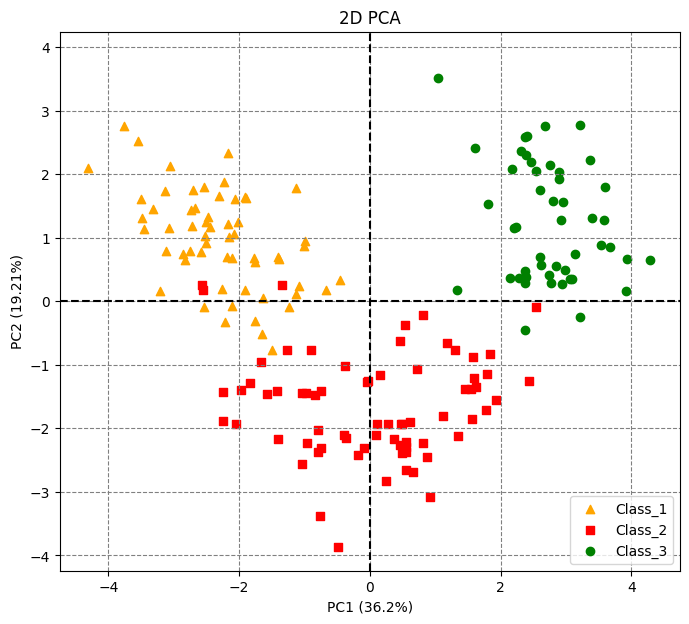

Sorted Eignevalues: 4.732
Sorted Eignevalues: 2.511
Sorted Eignevalues: 1.454
Sorted Eignevalues: 0.924
Sorted Eignevalues: 0.858
Sorted Eignevalues: 0.645
Sorted Eignevalues: 0.554
Sorted Eignevalues: 0.35
Sorted Eignevalues: 0.291
Sorted Eignevalues: 0.252
Explained Variance: 36.2%
Explained Variance: 19.21%
Explained Variance: 11.12%
Explained Variance: 7.07%
Explained Variance: 6.56%
Explained Variance: 4.94%
Explained Variance: 4.24%
Explained Variance: 2.68%
Explained Variance: 2.22%
Explained Variance: 1.93%


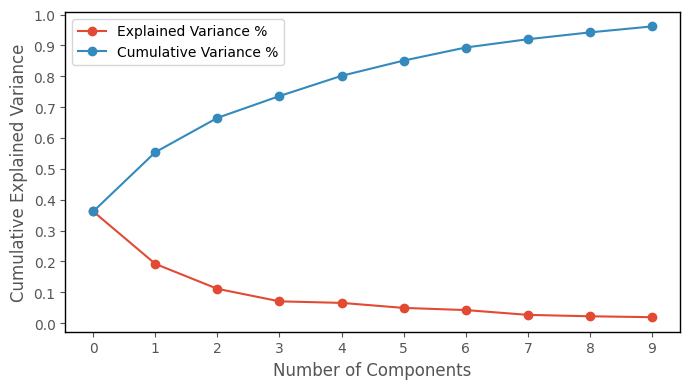

Print PCs Score:
           PC1       PC2  Target
0    1.528952 -0.913479       0
1    1.018516  0.210984       0
2    1.160164 -0.652552       0
3    1.731928 -1.744339       0
4    0.465085 -0.550463       0
..        ...       ...     ...
173 -1.553740 -1.402553       2
174 -1.199446 -1.112043       2
175 -1.234427 -1.747204       2
176 -1.100364 -1.453850       2
177 -1.479169 -1.752279       2

[178 rows x 3 columns]


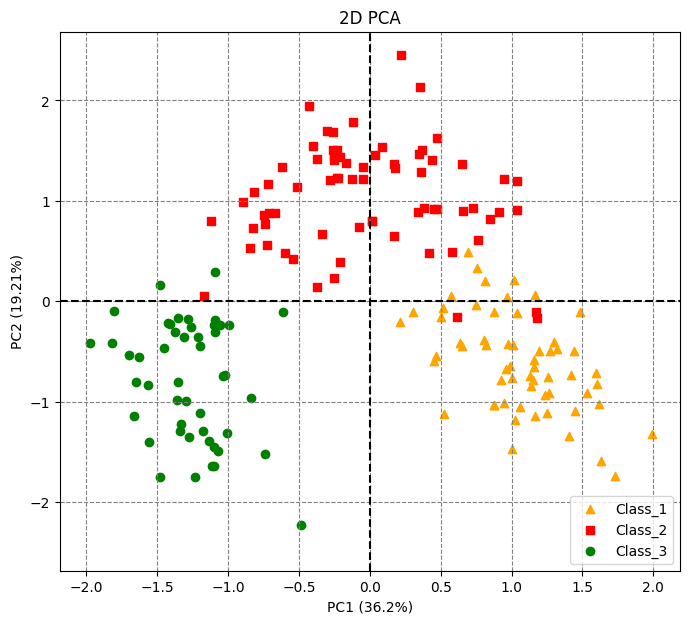

         PC1       PC2                       Feature
0   0.144329 -0.483652                       alcohol
1  -0.245188 -0.224931                    malic_acid
2  -0.002051 -0.316069                           ash
3  -0.239320  0.010591             alcalinity_of_ash
4   0.141992 -0.299634                     magnesium
5   0.394661 -0.065040                 total_phenols
6   0.422934  0.003360                    flavanoids
7  -0.298533 -0.028779          nonflavanoid_phenols
8   0.313429 -0.039302               proanthocyanins
9  -0.088617 -0.529996               color_intensity
10  0.296715  0.279235                           hue
11  0.376167  0.164496  od280/od315_of_diluted_wines
12  0.286752 -0.364903                       proline


In [ ]:
"""IMPORT DATASET"""
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
data = wine_data.data
target = wine_data.target
target_name = ['Class_1', 'Class_2', 'Class_3']
feature = wine_data.feature_names

#data, target, feature = wine_data['data'], wine_data['target'], wine_data['feature_names']

"""Data Standardization: Z-Score Normalization"""
df_ss = SS(data)

"""RUN PCA"""
pca_eigen(10, df_ss, target, target_name)
pca(10, df_ss, target, target_name, feature)